In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def funcion1(x):
    return 0.123

In [ ]:
df8=pd.read_csv('U1Dark10.csv')
df8

,theta,lambda1,lambda2,lambda3,gX,vX,yc,mh1,mh2,mZp,mX,rah
0,0.000007,0.258146,183.608032,0.002003,0.1,400.0,0.707107,125.1,5420.08166,200.0,200.0,0.2560
1,0.000112,0.258152,169.731277,0.030915,0.1,400.0,0.710642,125.1,5211.23831,200.0,201.0,0.2280
2,0.000382,0.258260,294.482503,0.182828,0.1,400.0,0.714178,125.1,6864.19750,200.0,202.0,0.2060
3,0.000726,0.258531,276.330150,0.325790,0.1,400.0,0.717713,125.1,6649.27419,200.0,203.0,0.1870
4,0.000002,0.258146,225.900004,0.000595,0.1,400.0,0.721249,125.1,6011.98808,200.0,204.0,0.1720
...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.000009,0.258146,247.332055,0.003436,0.1,400.0,4.228499,125.1,6290.71768,200.0,1196.0,0.0125
997,0.000004,0.258146,213.908216,0.001521,0.1,400.0,4.232034,125.1,5850.24056,200.0,1197.0,0.0124
998,0.000001,0.258146,172.687758,0.000407,0.1,400.0,4.235570,125.1,5256.42857,200.0,1198.0,0.0123
999,0.000034,0.258147,159.737832,0.008886,0.1,400.0,4.239105,125.1,5055.49731,200.0,1199.0,0.0122


In [ ]:
c9=[]
c10=[]

In [ ]:
for i in range(0,1000):
    mx=df8.loc[i,'mX']
    rah=df8.loc[i,'rah']
    c9.append(mx)
    c10.append(rah)
    c9array=np.array(c9)
    c10array=np.array(c10)
    datatable2={"mX":c9array,"rah":c10array}
    df9=pd.DataFrame(datatable2)


NameError: ignored

In [ ]:
df9

,mX,rah
0,200.0,0.2560
1,201.0,0.2280
2,202.0,0.2060
3,203.0,0.1870
4,204.0,0.1720
...,...,...
995,1195.0,0.0125
996,1196.0,0.0125
997,1197.0,0.0124
998,1198.0,0.0123


In [ ]:
def encontrar_interseccion(func, df9):
    def equation(x):
        return func(x) - np.interp(x, df9['mX'],df9['rah'])

    # Encuentra los puntos de intersección resolviendo la ecuación f(x) - df(x) = 0
    puntos_interseccion = fsolve(equation, x0=np.mean(df9['mX']))
    return puntos_interseccion

puntos_interseccion = encontrar_interseccion(funcion1, df9)
print("$m_\Psi$:", puntos_interseccion)

$m_\Psi$: [208.85714286]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


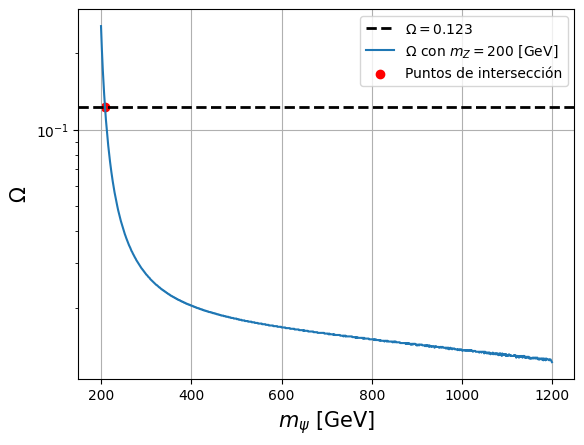

In [ ]:
x_vals = np.linspace(200, 1800, 1000)
y_vals = funcion1(x_vals)

plt.axhline(y=0.123, xmin= 0, xmax= 1500, linewidth=2, linestyle="--", label=r"$\Omega=0.123$", color='black')
plt.semilogy(df9['mX'],df9['rah'], label=r"$\Omega$ con $m_{Z}=200$ [GeV]")

#plt.plot(x_vals, y_vals, label='Función 1: sin(x) + 2')
#plt.plot(df['x'], df['y'], 'bo', label='Datos DataFrame')
plt.scatter(puntos_interseccion, [funcion1(x) for x in puntos_interseccion], color='red', label='Puntos de intersección')
plt.legend()
plt.xlabel(r'$m_\psi$ [GeV]',size=15)
plt.ylabel(r'$\Omega$',size=15)
#plt.plot(x,y,'*k')
plt.legend()
plt.grid(True)
plt.savefig('parameter_space_m_Z.pdf')
plt.show()
